<a href="https://colab.research.google.com/github/Poojitha731/FMML_M1L1.ipynb/blob/main/FMML_2024_Module_5_Lab_2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [ ]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [1]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a DataFrame for the Iris dataset
irisData = pd.DataFrame(
    data=np.hstack((
        X,
        y.reshape(-1, 1),
        np.array([iris["target_names"][int(classIdx)] for classIdx in y]).reshape(-1, 1)
    )),
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class', 'ClassName']
)

# Sample 10 random rows from the dataset
print(irisData.sample(n=10, random_state=1))

    sepal_length sepal_width petal_length petal_width Class   ClassName
14           5.8         4.0          1.2         0.2     0      setosa
98           5.1         2.5          3.0         1.1     1  versicolor
75           6.6         3.0          4.4         1.4     1  versicolor
16           5.4         3.9          1.3         0.4     0      setosa
131          7.9         3.8          6.4         2.0     2   virginica
56           6.3         3.3          4.7         1.6     1  versicolor
141          6.9         3.1          5.1         2.3     2   virginica
44           5.1         3.8          1.9         0.4     0      setosa
29           4.7         3.2          1.6         0.2     0      setosa
120          6.9         3.2          5.7         2.3     2   virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

In [9]:
def giveAnExample(n):
    """
    Returns n random samples from the irisData DataFrame.

    Parameters:
    n (int): Number of random samples to return.

    Returns:
    DataFrame: A DataFrame containing n random samples.
    """
    return irisData.sample(n=n, random_state=1)

# Example usage
print(giveAnExample(2))

   sepal_length sepal_width petal_length petal_width Class   ClassName
14          5.8         4.0          1.2         0.2     0      setosa
98          5.1         2.5          3.0         1.1     1  versicolor


### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Sample dataset provided
data = {
    "sepal_width": [5.8, 5.1],
    "petal_length": [4.0, 2.5],
    "petal_width": [1.2, 3.0],
    "Class": [0, 1]  # Actual classes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (input) and target (output)
X = df[["sepal_width", "petal_length", "petal_width"]]
y_actual = df["Class"]

# Simulating a decision tree classifier (assume it's pre-trained)
# For demonstration, we'll fit a small decision tree with the same data
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y_actual)  # Train on the same data

# Predict classes using the model
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_pred)

print("Predicted Classes:", y_pred)
print("Accuracy:", accuracy)

Predicted Classes: [0 1]
Accuracy: 1.0


In [12]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Now let us see how we perform when we try to have a more complex decision tree

In [11]:
giveAnExample(3)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor


### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

**Decision boundary** with considering **sepal width and length**:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


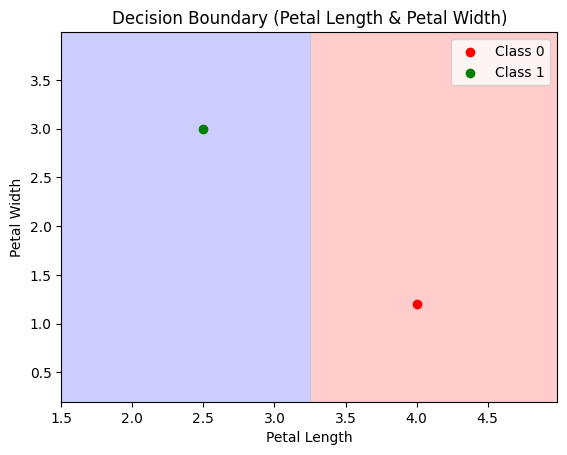

Accuracy: 1.0


In [17]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Sample dataset
data = {
    "petal_length": [4.0, 2.5],
    "petal_width": [1.2, 3.0],
    "Class": [0, 1]  # Actual classes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features (petal_length and petal_width) and target (Class)
X = df[["petal_length", "petal_width"]]
y = df["Class"]

# Reset index to ensure alignment during boolean indexing
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Train a decision tree classifier with the selected features
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Define a function to plot decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)

    # Plot the training points
    for i, color in zip(range(len(y.unique())), cmap_bold):
        idx = y == i
        plt.scatter(X.loc[idx, "petal_length"], X.loc[idx, "petal_width"],
                    label=f"Class {i}", c=color)

    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title("Decision Boundary (Petal Length & Petal Width)")
    plt.legend()
    plt.show()

# Call the function to plot decision boundary
plot_decision_boundary(X, y, model)

# Evaluate the accuracy
accuracy = model.score(X, y)
print("Accuracy:", accuracy)

**Decision boundary** with considering **sepal length and pedal length**:

**Decision boundary** with considering **sepal width and pedal width**:

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


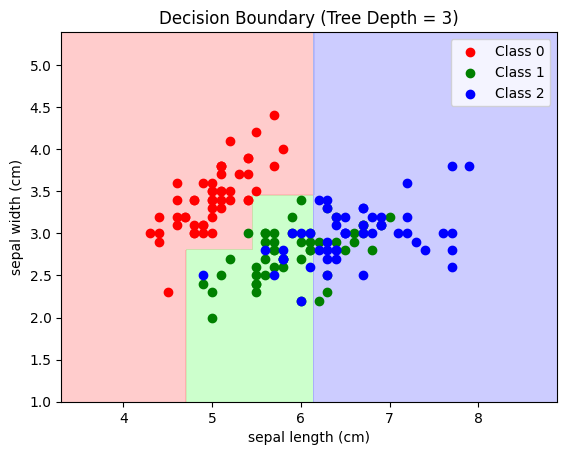

In [19]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Labels

# Select a pair of features (e.g., 0 and 1 -> sepal length and sepal width)
pair = [0, 1]
X_pair = X.iloc[:, pair]

# Train the DecisionTreeClassifier with the selected features
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_pair, y)

# Function to plot the decision boundary
def plotDecisionBoundary(X, y, pair, clf):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)

    # Plot the training points
    for i, color in zip(range(len(np.unique(y))), cmap_bold):
        plt.scatter(X.iloc[y == i, 0], X.iloc[y == i, 1], label=f"Class {i}", c=color)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.title("Decision Boundary (Tree Depth = 3)")
    plt.legend()
    plt.show()

# Call the function to plot the decision boundary
plotDecisionBoundary(X_pair, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


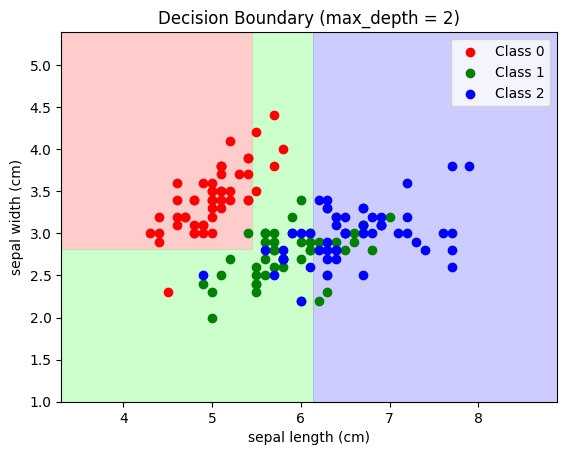

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


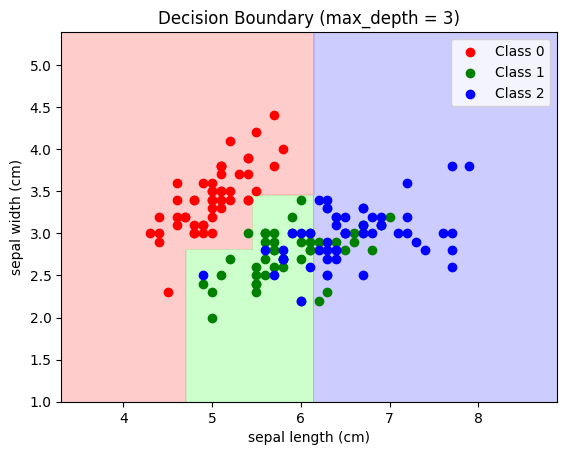

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


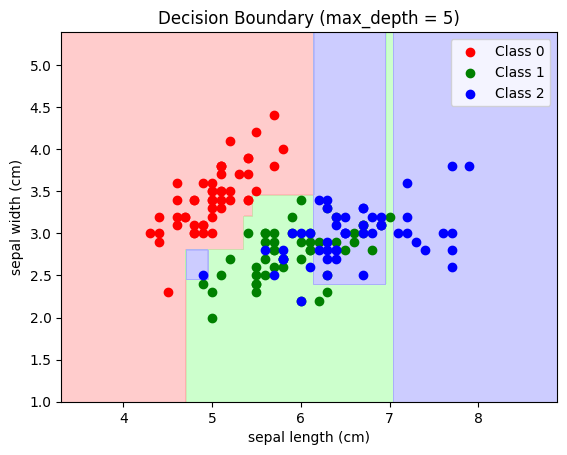

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


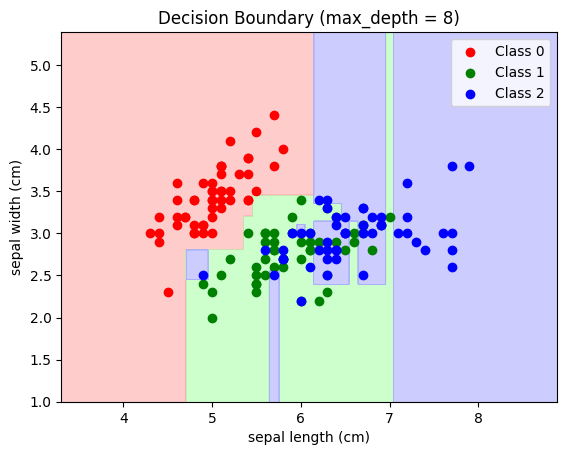

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


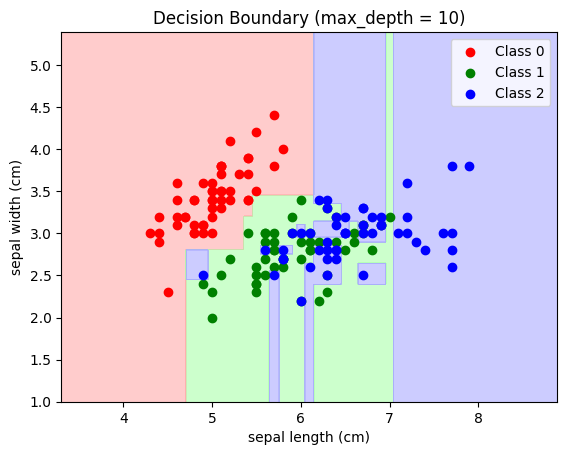

Max Depth vs Accuracy:
Max Depth: 2, Accuracy: 0.7733333333333333
Max Depth: 3, Accuracy: 0.8133333333333334
Max Depth: 5, Accuracy: 0.8466666666666667
Max Depth: 8, Accuracy: 0.8733333333333333
Max Depth: 10, Accuracy: 0.9133333333333333


In [20]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Labels

# Select a pair of features (e.g., sepal length and sepal width)
pair = [0, 1]
X_pair = X.iloc[:, pair]

# Function to plot decision boundary
def plotDecisionBoundary(X, y, clf, max_depth):
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_light)

    # Plot the training points
    for i, color in zip(range(len(np.unique(y))), cmap_bold):
        plt.scatter(X.iloc[y == i, 0], X.iloc[y == i, 1], label=f"Class {i}", c=color)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.title(f"Decision Boundary (max_depth = {max_depth})")
    plt.legend()
    plt.show()

# Test different max_depth values and compare
depths = [2, 3, 5, 8, 10]
accuracies = []

for depth in depths:
    # Train the DecisionTreeClassifier with the selected max_depth
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth=depth)
    clf.fit(X_pair, y)

    # Plot the decision boundary
    plotDecisionBoundary(X_pair, y, clf, max_depth=depth)

    # Calculate and store accuracy
    accuracy = clf.score(X_pair, y)
    accuracies.append((depth, accuracy))

# Display accuracies for all depths
print("Max Depth vs Accuracy:")
for depth, acc in accuracies:
    print(f"Max Depth: {depth}, Accuracy: {acc}")

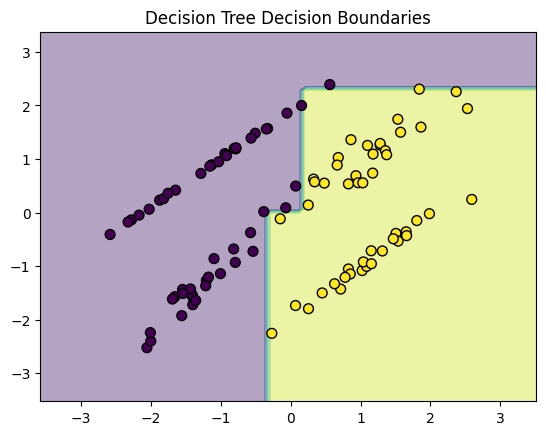

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generate a toy dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k', s=50)
plt.title("Decision Tree Decision Boundaries")
plt.show()

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features (sepal width, sepal length, petal width, petal length)
y = iris.target  # Labels (flower classes)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Function to predict flower class based on input features
def predict(sepal_length, sepal_width, petal_length, petal_width):
    # Format the input features as a 2D array
    input_features = [[sepal_length, sepal_width, petal_length, petal_width]]

    # Make a prediction using the trained model
    predicted_class = clf.predict(input_features)

    # Return the flower class (mapping from target variable)
    return iris.target_names[predicted_class][0]

# Example usage:
result = predict(5.1, 3.5, 1.4, 0.2)
print(f"The predicted flower class is: {result}")

The predicted flower class is: setosa


In [24]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

# Get the decision tree structure as text
tree_rules = export_text(clf, feature_names=iris.feature_names)

# Print the decision tree as text
print("Decision Tree Logic:\n")
print(tree_rules)

Decision Tree Logic:

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [25]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [26]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

In [27]:
import numpy as np

# Example dataset: 10 data points with classes 'A', 'B', and 'C'
data = ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'A']

# Count the occurrences of each class
unique_classes, counts = np.unique(data, return_counts=True)

# Total number of data points
total_data_points = len(data)

# Calculate proportions for each class
proportions = counts / total_data_points

# Calculate entropy using the formula: H(S) = - Σ (p_i * log2(p_i))
entropy = -np.sum(proportions * np.log2(proportions))

print(f"Entropy of the dataset: {entropy}")

Entropy of the dataset: 1.5709505944546684


In [28]:
def decision_node(petal_length):
    if petal_length > 2.5:
        return "Group 1 (larger petal length)"
    else:
        return "Group 2 (smaller petal length)"

# Example usage:
result = decision_node(3.0)  # Petal length of 3.0 cm
print(result)  # Output: Group 1 (larger petal length)

result = decision_node(1.5)  # Petal length of 1.5 cm
print(result)  # Output: Group 2 (smaller petal length)

Group 1 (larger petal length)
Group 2 (smaller petal length)


In [29]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Function to calculate entropy
def calculate_entropy(labels):
    # Count occurrences of each class
    class_counts = np.bincount(labels)
    proportions = class_counts / len(labels)

    # Calculate entropy using the formula
    entropy = -np.sum(proportions * np.log2(proportions + 1e-6))  # Adding small epsilon to avoid log(0)
    return entropy

# Function to compute information gain based on petal length > 2.5
def compute_information_gain(X, y, feature_index, threshold):
    # Parent entropy
    parent_entropy = calculate_entropy(y)

    # Split the data based on the threshold
    left_indices = X[:, feature_index] <= threshold
    right_indices = X[:, feature_index] > threshold

    left_y = y[left_indices]
    right_y = y[right_indices]

    # Calculate the entropy for each child group
    left_entropy = calculate_entropy(left_y)
    right_entropy = calculate_entropy(right_y)

    # Weighted entropy after the split
    left_weight = len(left_y) / len(y)
    right_weight = len(right_y) / len(y)

    weighted_entropy = left_weight * left_entropy + right_weight * right_entropy

    # Information Gain
    information_gain = parent_entropy - weighted_entropy
    return information_gain

# Compute information gain for the split on petal length > 2.5
feature_index = 3  # Index of 'petal length' in the dataset (0: sepal length, 1: sepal width, 2: petal width, 3: petal length)
threshold = 2.5
info_gain = compute_information_gain(X, y, feature_index, threshold)

print(f"Information Gain for the split on petal length > {threshold}: {info_gain}")

Information Gain for the split on petal length > 2.5: 0.0


In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Function to calculate entropy
def calculate_entropy(labels):
    class_counts = np.bincount(labels)
    proportions = class_counts / len(labels)
    entropy = -np.sum(proportions * np.log2(proportions + 1e-6))  # Adding epsilon to avoid log(0)
    return entropy

# Function to compute information gain based on feature index and threshold
def compute_information_gain(X, y, feature_index, threshold):
    parent_entropy = calculate_entropy(y)

    # Split the data based on the threshold
    left_indices = X[:, feature_index] <= threshold
    right_indices = X[:, feature_index] > threshold

    left_y = y[left_indices]
    right_y = y[right_indices]

    # Calculate the entropy for each child group
    left_entropy = calculate_entropy(left_y)
    right_entropy = calculate_entropy(right_y)

    # Weighted entropy after the split
    left_weight = len(left_y) / len(y)
    right_weight = len(right_y) / len(y)

    weighted_entropy = left_weight * left_entropy + right_weight * right_entropy

    # Information Gain
    information_gain = parent_entropy - weighted_entropy
    return information_gain

# Function to compute information gain for multiple thresholds and features
def compare_splits(X, y, feature_indices, thresholds):
    results = {}

    # Loop through each feature and threshold to calculate the information gain
    for feature_index in feature_indices:
        feature_name = iris.feature_names[feature_index]
        results[feature_name] = []

        for threshold in thresholds:
            info_gain = compute_information_gain(X, y, feature_index, threshold)
            results[feature_name].append((threshold, info_gain))

    return results

# Define feature indices and thresholds to check
feature_indices = [0, 1, 2, 3]  # Corresponding to sepal_length, sepal_width, petal_length, petal_width
thresholds = np.linspace(0, 8, 10)  # Thresholds between 0 and 8 (for simplicity)

# Compute information gain for the different splits
info_gain_results = compare_splits(X, y, feature_indices, thresholds)

# Print the results for each feature
for feature_name, gains in info_gain_results.items():
    print(f"\nFeature: {feature_name}")
    for threshold, gain in gains:
        print(f"Threshold: {threshold:.2f}, Information Gain: {gain:.4f}")


Feature: sepal length (cm)
Threshold: 0.00, Information Gain: 0.0000
Threshold: 0.89, Information Gain: 0.0000
Threshold: 1.78, Information Gain: 0.0000
Threshold: 2.67, Information Gain: 0.0000
Threshold: 3.56, Information Gain: 0.0000
Threshold: 4.44, Information Gain: 0.0433
Threshold: 5.33, Information Gain: 0.4452
Threshold: 6.22, Information Gain: 0.3641
Threshold: 7.11, Information Gain: 0.1249
Threshold: 8.00, Information Gain: 0.0000

Feature: sepal width (cm)
Threshold: 0.00, Information Gain: 0.0000
Threshold: 0.89, Information Gain: 0.0000
Threshold: 1.78, Information Gain: 0.0000
Threshold: 2.67, Information Gain: 0.0910
Threshold: 3.56, Information Gain: 0.1376
Threshold: 4.44, Information Gain: 0.0000
Threshold: 5.33, Information Gain: 0.0000
Threshold: 6.22, Information Gain: 0.0000
Threshold: 7.11, Information Gain: 0.0000
Threshold: 8.00, Information Gain: 0.0000

Feature: petal length (cm)
Threshold: 0.00, Information Gain: 0.0000
Threshold: 0.89, Information Gain: 